# Assignment 4
## Econ 8310 - Business Forecasting

This assignment will make use of the bayesian statistical models covered in Lessons 10 to 12.

A/B Testing is a critical concept in data science, and for many companies one of the most relevant applications of data-driven decision-making. In order to improve product offerings, marketing campaigns, user interfaces, and many other user-facing interactions, scientists and engineers create experiments to determine the efficacy of proposed changes. Users are then randomly assigned to either the treatment or control group, and their behavior is recorded.
If the changes that the treatment group is exposed to can be measured to have a benefit in the metric of interest, then those changes are scaled up and rolled out to across all interactions.
Below is a short video detailing the A/B Testing process, in case you want to learn a bit more:
[https://youtu.be/DUNk4GPZ9bw](https://youtu.be/DUNk4GPZ9bw)

For this assignment, you will use an A/B test data set, which was pulled from the Kaggle website (https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing). I have added the data from the page into Codio for you. It can be found in the cookie_cats.csv file in the file tree. It can also be found at [https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv](https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv)

The variables are defined as follows:

| Variable Name  | Definition |
|----------------|----|
| userid         | A unique number that identifies each player  |
| version        | Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40) |
| sum_gamerounds | The number of game rounds played by the player during the first 14 days after install.  |
| retention1     | Did the player come back and play 1 day after installing?     |
| retention7     | Did the player come back and play 7 days after installing?    |               

### The questions

You will be asked to answer the following questions in a small quiz on Canvas:
1. What was the effect of moving the gate from level 30 to level 40 on 1-day retention rates?
2. What was the effect of moving the gate from level 30 to level 40 on 7-day retention rates?
3. What was the biggest challenge for you in completing this assignment?

You will also be asked to submit a URL to your forked GitHub repository containing your code used to answer these questions.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")

# Quick look
print(df.head())
print(df['version'].value_counts())
print(df.describe())

# Group by version and calculate mean retention
retention_summary = df.groupby('version')[['retention_1', 'retention_7']].mean()
print(retention_summary)


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64
             userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06    49854.000000
         retention_1  retention_7
version                          
gate_30     0.448188     0.190201
gate_40     0.442283     0.182000


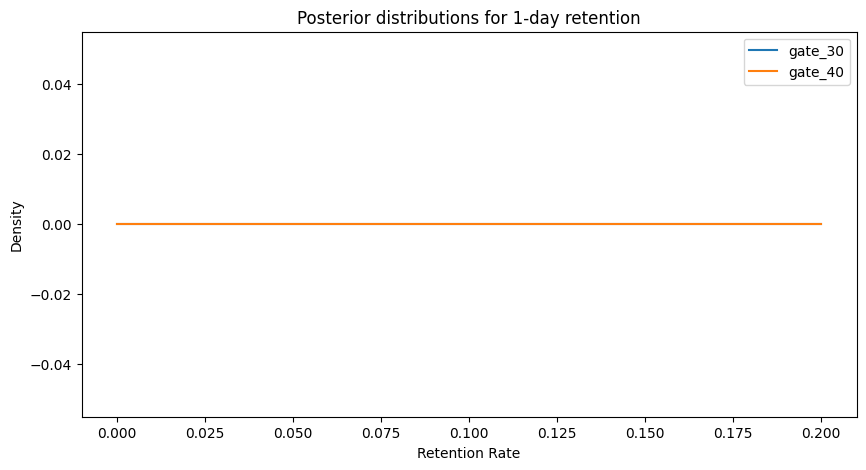

Probability that gate_40 is better (1-day): 0.036


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Count successes and trials for each group
def get_counts(df, group, col):
    group_df = df[df['version'] == group]
    successes = group_df[col].sum()
    trials = group_df.shape[0]
    return successes, trials

# 1-day retention
succ_30, n_30 = get_counts(df, 'gate_30', 'retention_1')
succ_40, n_40 = get_counts(df, 'gate_40', 'retention_1')

# Posterior distributions
x = np.linspace(0, 0.2, 1000)
posterior_30 = beta(succ_30 + 1, n_30 - succ_30 + 1)
posterior_40 = beta(succ_40 + 1, n_40 - succ_40 + 1)

plt.figure(figsize=(10,5))
plt.plot(x, posterior_30.pdf(x), label='gate_30')
plt.plot(x, posterior_40.pdf(x), label='gate_40')
plt.legend()
plt.title('Posterior distributions for 1-day retention')
plt.xlabel('Retention Rate')
plt.ylabel('Density')
plt.show()


samples_30 = posterior_30.rvs(100000)
samples_40 = posterior_40.rvs(100000)

prob_40_better = (samples_40 > samples_30).mean()
print(f"Probability that gate_40 is better (1-day): {prob_40_better:.3f}")
